In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load two images
img1 = cv2.imread('festevents.jpg')
img2 = cv2.imread('opencv_logo.png') 
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape #이미지 두개의 shape 를 가져옴 세 값을 출력하면 opencv가 뜸 채널3=컬러이미지 
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)#이미지 2를 gray이미지를 만듬 
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)#10에서 25로 THRESHOLD 해서 mask를 만듦. 10보다 작으면 0으로 봄  
mask_inv = cv2.bitwise_not(mask)#255  흰 0검 반전시키기 
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)#bitwise -첫번째 있는 이미지와 두번째 있는 이미지를 and로 만듬  or - 11 01 -> 0
 # Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg) #img가 destination 
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture('tracking1.avi')
while(cap.isOpened()): 
    # Take each frame
    ret, frame = cap.read() 
    if ret== False:    
        break
    # Convert BGR to HSVhsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255]) 
# Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame) #
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
img = cv2.imread('sIMG_2164.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

In [ ]:
titles = ['Original Image','BINARY']
images = [img, thresh1]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

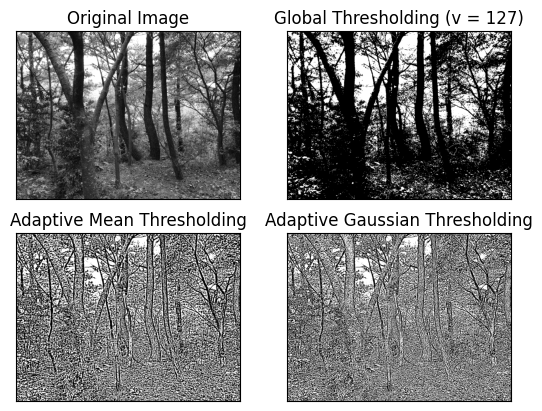

In [22]:
img = cv2.imreadsIMG_2177.jpg('',0)
#img = cv2.medianBlur(img,5)#노이즈 제거할때 탁월 중간값
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #노이즈
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)#각 영역별로 자기가 값 결정
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):  
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


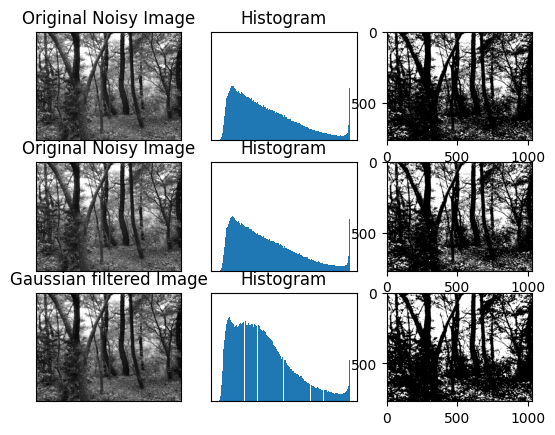

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sIMG_2177.jpg',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title
plt.show()